Link to code: <>

## Linear Regression

Linear Regression Algorithms take our data, encoded in the usual feature matrix $\textbf{X}$, and a target vector $\textbf{y}$ of values, and creates a prediction for these values.

The goal of this blog post is to compare the analytic and gradient methods of Linear Regression, implement LASSO regularization, and implement our algorithms to some data.

### Analytic and Gradient Methods

As usual, we start by getting our data. Notice here we have generated the training and validation data randomly.

In [1]:
from linear_regression import LinearRegression

import numpy as np
from matplotlib import pyplot as plt

def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)

def LR_data(n_train = 100, n_val = 100, p_features = 1, noise = .1, w = None):
    if w is None: 
        w = np.random.rand(p_features + 1) + .2
    
    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)
    
    return X_train, y_train, X_val, y_val

In [2]:
%load_ext autoreload
%autoreload 2

For simplicity, we start with 2D linear data.

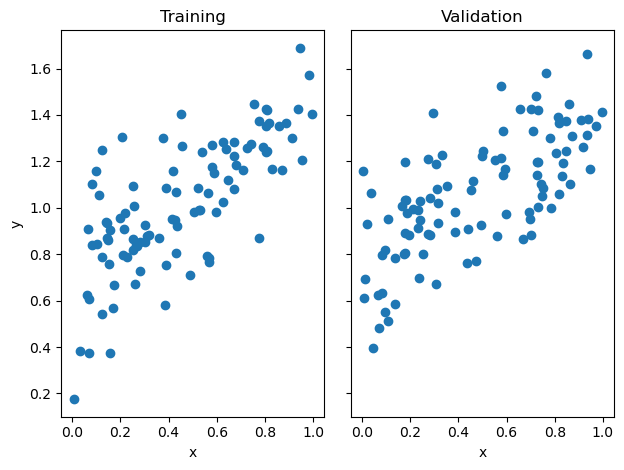

In [3]:
n_train = 100
n_val = 100
p_features = 1
noise = 0.2

# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

# plot it
fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
axarr[0].scatter(X_train, y_train)
axarr[1].scatter(X_val, y_val)
labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
labs = axarr[1].set(title = "Validation", xlabel = "x")
plt.tight_layout()

The analytic method uses matrix multiplication. As long as $\mathbf{X^{T} X}$ is invertible, it is possible to find exact solution that will minimize the loss. This, however, is costly. If there are $p$ features and $n$ data points, the algorithm will take time $O(np^2)$.

In [4]:
LR = LinearRegression()
LR.fit_analytic(X_train, y_train) # I used the analytical formula as my default fit method

print(f"Training score = {LR.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR.score(X_val, y_val).round(4)}")
print("Weight vector: ",LR.w)

Training score = 0.5345
Validation score = 0.4582
Weight vector:  [0.74340828 0.67994067]


On the other, using gradient descent can be much faster as each step only takes time $O(p^2)$ and potentially will not need as many steps to achieve a good result.

As we can see below, with 100 maximum iterations and a learning rate of 0.001, we achieve a training and validation score that is similar to the analytic algorithm.

In [5]:
LR2 = LinearRegression()

LR2.fit_gradient(X_train, y_train,max_iter = int(1e2), alpha = 0.001)
print(f"Training score = {LR2.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR2.score(X_val, y_val).round(4)}")
print("Weight vector: ",LR2.w)

Training score = 0.5343
Validation score = 0.462
Weight vector:  [0.73177951 0.68551826]


Text(0.5, 1.0, 'Linear Regression Gradient Descent Score')

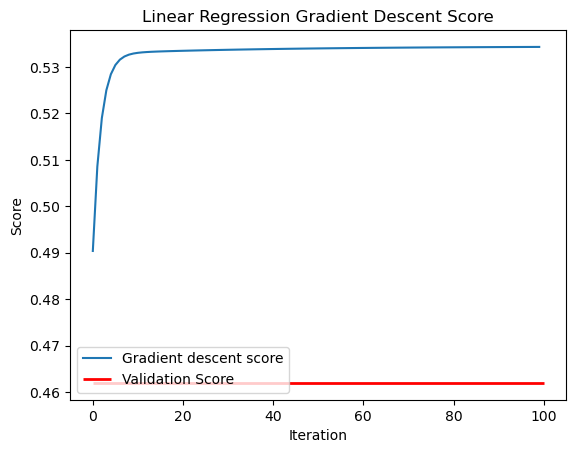

In [6]:
plt.plot(LR2.score_history,label="Gradient descent score")
plt.hlines(y=LR2.score(X_val, y_val), xmin=0, xmax=int(1e2), linewidth=2, color='r',label="Validation Score")
labels = plt.gca().set(xlabel = "Iteration", ylabel = "Score")
plt.legend()
plt.title("Linear Regression Gradient Descent Score")

In [7]:
for i in range(len(LR2.score_history)-1):
    if (LR2.score_history[i+1] < LR2.score_history[i]):
        print("ISSUE!")

Comparing the fits of the analytic and gradient descent methods, we can see that both are close and appear to follow the trend of the data.

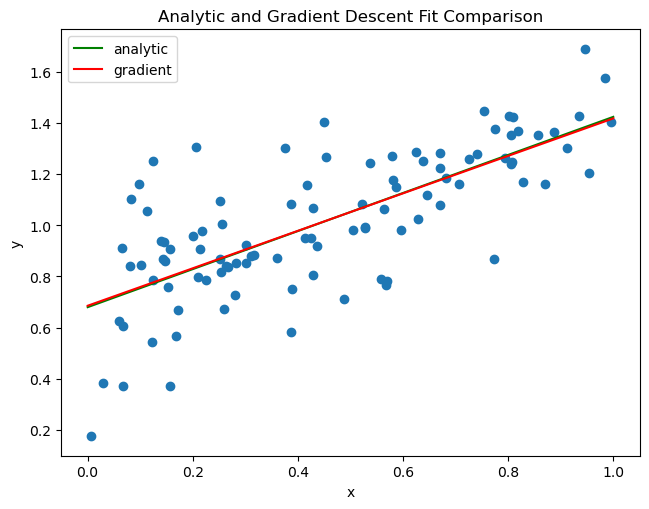

In [8]:
def draw_line(w, x_min, x_max,title,c):
  x = np.linspace(x_min, x_max, 101)
  #y = -(w[0]*x + w[2])/w[1]
  y = (w[0]*x + w[1])
  plt.plot(x, y, color = c,label=title)

# plot it
fig = plt.scatter(X_train, y_train)
fig = draw_line(LR.w, 0, 1,"analytic","green")
fig = draw_line(LR2.w, 0, 1,"gradient","red")
#labs = plt.set(title = "Training", xlabel = "x", ylabel = "y")
#labs = axarr[1].set(title = "Validation", xlabel = "x")
plt.tight_layout()
plt.legend()
plt.title("Analytic and Gradient Descent Fit Comparison")
labels = plt.gca().set(xlabel = "x", ylabel = "y")

### Breaking Linear Regression

In the above case, we only used 1 feature with 100 data points. However, we can also experiment with the success of the algorithm when we increase the number of features from 1 to 99.

Note that I use the analytic algorithm so that this reflects the limitations of the linear regression algorithm itself.

In [9]:
n_train = 100
n_val = 100
#p_features = 1
noise = 0.2

p_features_list = [i for i in range(1,n_train)]

train_scores = []
val_scores = []

for p_features_test in p_features_list:
    
    # create some data
    X_train_test, y_train_test, X_val_test, y_val_test = LR_data(n_train, n_val, p_features_test, noise)
    
    LR_test = LinearRegression()
    LR_test.fit_analytic(X_train_test, y_train_test)
    
    train_score = LR_test.score(X_train_test, y_train_test)
    val_score = LR_test.score(X_val_test, y_val_test)
    
    train_scores.append(train_score)
    val_scores.append(val_score)

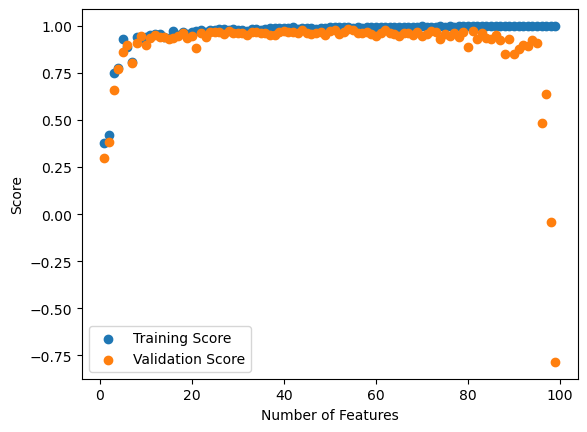

In [10]:
plt.xlabel("Number of Features")
plt.ylabel("Score")
#plt.scatter(p_features_list[80:95],train_scores[80:95])
#plt.scatter(p_features_list[80:95],val_scores[80:95])
plt.scatter(p_features_list,train_scores)
plt.scatter(p_features_list,val_scores)
plt.legend(labels=["Training Score","Validation Score"])
#print(train_scores)

Here I have plotted the training and validation scores. So we can see that the training score continually increases, reaching a perfect score of 1.0 at 99 features.

As expected, the training score is always larger than the validation score. We can see that after about 50 features, the validation score drops, dropping to a negative once 99 features are reached. This is a consequence of overfitting. It seems that linear regression naturally overfits if the number of features is close to the number of data points. Perhaps this is not unsurprising since information wise, if we as many features as out data, we can describe our data completely. Of course, this would not predict the trend, hence the overfitting.

Note that a negative validation score means that our fit is worse than just using the average. We are minimizing the loss $|| \textbf{X}\textbf{w} - \textbf{y}||^{2}_{2}$. But if there are 99 features and 100 data points, really $\textbf{X}$ is 100 by 100 in dimension (since it is padded by a column of 1s). Hence it could be possible to invert $\textbf{X}$, a square matrix, which would give a unique solution to $\textbf{X}\textbf{w} = \textbf{y}$. This solution would minimize loss. This may sound good, but this means that our algorithm perfectly minimizes loss to 0 on the training data, hence the perfect 100% score on the training data and the overfitting or poor score on the validation data.

### Fixing Linear Regression with LASSO Regularization

It is not great that we can break Linear Regression, since in some cases we may want to use it when we have a lot of features. We can fix this with LASSO Regularization, an addition to the loss function that will specify the weights to be small or zero in value (I assume LASSO is a play on the fact that it lassoes the weights, keeping them small). This should prevent overfitting by practically reducing the actual number of parameters that are significant to our predictions.

No surprise here, we use sklearn for our LASSO module.

In [11]:
from sklearn.linear_model import Lasso

n_train = 100
n_val = 100
#p_features = 1
noise = 0.2

p_features_list = [i for i in range(1,n_train)]

Lasso_train_scores = []
Lasso_val_scores = []

alpha_list = [0.0005,0.001,0.005,0.01]

train_scores = []
val_scores = []

for p_features_test in p_features_list:
    
    # create some data
    X_train_test, y_train_test, X_val_test, y_val_test = LR_data(n_train = n_train, n_val = n_val, p_features = p_features_test, noise = noise)
    
    for alpha in alpha_list:
        L_test = Lasso(alpha = alpha)
        L_test.fit(X_train_test, y_train_test)
        
        train_score = L_test.score(X_train_test, y_train_test)
        val_score = L_test.score(X_val_test, y_val_test)
        
        Lasso_train_scores.append(train_score)
        Lasso_val_scores.append(val_score)
    
    LR_test = LinearRegression()
    LR_test.fit_analytic(X_train_test,y_train_test)
    
    train_score = LR_test.score(X_train_test, y_train_test)
    val_score = LR_test.score(X_val_test, y_val_test)
    
    train_scores.append(train_score)
    val_scores.append(val_score)

Text(0, 0.5, 'Validation Score')

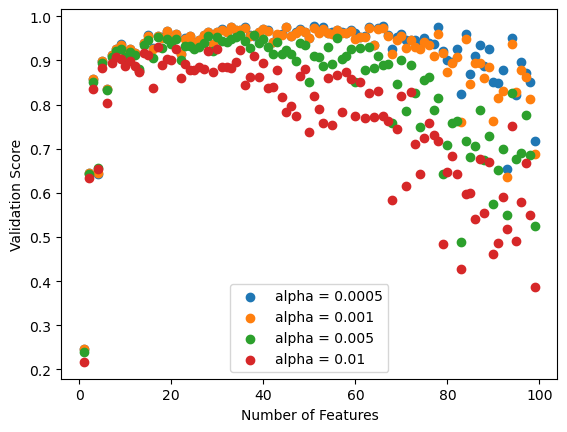

In [12]:
plt.scatter(p_features_list,[Lasso_val_scores[4*i] for i in range(len(p_features_list))]) #alpha = 0.0005
plt.scatter(p_features_list,[Lasso_val_scores[4*i+1] for i in range(len(p_features_list))]) #alpha = 0.001
plt.scatter(p_features_list,[Lasso_val_scores[4*i+2] for i in range(len(p_features_list))]) #alpha = 0.005
plt.scatter(p_features_list,[Lasso_val_scores[4*i+3] for i in range(len(p_features_list))]) #alpha = 0.01
plt.legend(labels=["alpha = 0.0005","alpha = 0.001","alpha = 0.005","alpha = 0.01"])

plt.xlabel("Number of Features")
plt.ylabel("Validation Score")

Varying the Lasso algorithm over a variety of alpha or learning parameter values, we see that a value of 0.0005 produces the best validation score.

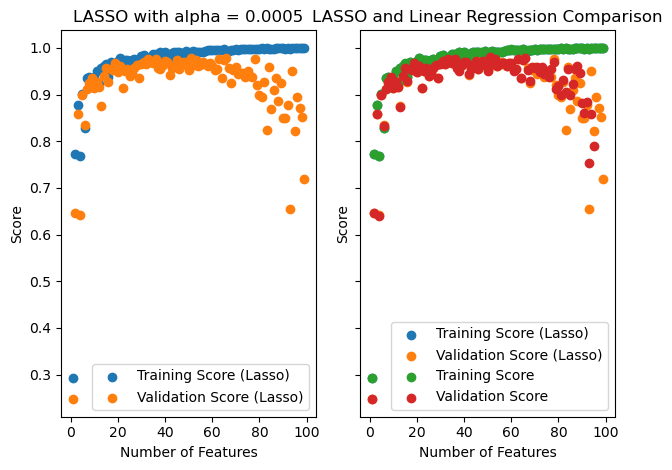

In [13]:
fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)

axarr[0].scatter(p_features_list,[Lasso_train_scores[4*i] for i in range(len(p_features_list))]) #alpha = 0.0005
axarr[0].scatter(p_features_list,[Lasso_val_scores[4*i] for i in range(len(p_features_list))]) #alpha = 0.0005

axarr[0].legend(labels=["Training Score (Lasso)","Validation Score (Lasso)"])

axarr[1].scatter(p_features_list,[Lasso_train_scores[4*i] for i in range(len(p_features_list))])
axarr[1].scatter(p_features_list,[Lasso_val_scores[4*i] for i in range(len(p_features_list))])
axarr[1].scatter(p_features_list,train_scores)
axarr[1].scatter(p_features_list[:95],val_scores[:95])

axarr[1].legend(labels=["Training Score (Lasso)","Validation Score (Lasso)","Training Score","Validation Score"])

labs = axarr[0].set(title = "LASSO with alpha = 0.0005", xlabel = "Number of Features", ylabel = "Score")
labs = axarr[1].set(title = "LASSO and Linear Regression Comparison", xlabel = "Number of Features", ylabel = "Score")
plt.tight_layout()

So we can see that the validation score never becomes negative, though it still drops after about 50 features.

I have excluded the validation scores that are negative for regular linear regression, and we can see that LASSO is pretty similar for a large number of features (just not very close to 99). Perhaps it is not much better at controlling for overfitting.

### Applying Linear Regression to the Bikeshare Data Set

The bikeshare data set predicts the number of bicycle riders each day. Some features including the date, temperature, holiday, etc. are given.

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
bikeshare = pd.read_csv("https://philchodrow.github.io/PIC16A/datasets/Bike-Sharing-Dataset/day.csv")

bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


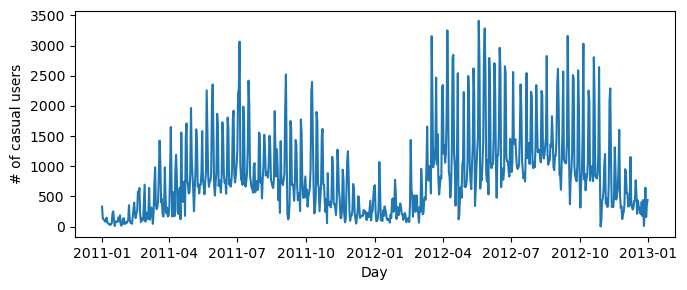

In [15]:
# import datetime
fig, ax = plt.subplots(1, figsize = (7, 3))
ax.plot(pd.to_datetime(bikeshare['dteday']), bikeshare['casual'])
ax.set(xlabel = "Day", ylabel = "# of casual users")
l = plt.tight_layout()

Plotting the data, we can see a general trend that during the warmer months from May to September, the number of casual users increases.

In [16]:
cols = ["casual", 
        "mnth", 
        "weathersit", 
        "workingday",
        "yr",
        "temp", 
        "hum", 
        "windspeed",
        "holiday"]

bikeshare = bikeshare[cols]

bikeshare = pd.get_dummies(bikeshare, columns = ['mnth'], drop_first = "if_binary")
bikeshare

,casual,weathersit,workingday,yr,temp,hum,windspeed,holiday,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,331,2,0,0,0.344167,0.805833,0.160446,0,0,0,0,0,0,0,0,0,0,0,0
1,131,2,0,0,0.363478,0.696087,0.248539,0,0,0,0,0,0,0,0,0,0,0,0
2,120,1,1,0,0.196364,0.437273,0.248309,0,0,0,0,0,0,0,0,0,0,0,0
3,108,1,1,0,0.200000,0.590435,0.160296,0,0,0,0,0,0,0,0,0,0,0,0
4,82,1,1,0,0.226957,0.436957,0.186900,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,247,2,1,1,0.254167,0.652917,0.350133,0,0,0,0,0,0,0,0,0,0,0,1
727,644,2,1,1,0.253333,0.590000,0.155471,0,0,0,0,0,0,0,0,0,0,0,1
728,159,2,0,1,0.253333,0.752917,0.124383,0,0,0,0,0,0,0,0,0,0,0,1
729,364,1,0,1,0.255833,0.483333,0.350754,0,0,0,0,0,0,0,0,0,0,0,1


Here we limit the features we examine to the month, weather situation, whether it is a working day, the year, temperature, humidity, windspeed, and whether it is a holiday.

In [17]:
train, test = train_test_split(bikeshare, test_size = .2, shuffle = False)

X_train = train.drop(["casual"], axis = 1)
y_train = train["casual"]

X_test = test.drop(["casual"], axis = 1)
y_test = test["casual"]

In [18]:
LR_bike = LinearRegression()
LR_bike.fit_gradient(X_train,y_train,max_iter=int(1e3),alpha=0.0001)
print("Training score: ",LR_bike.score(X_train,y_train))
print("Validation score: ",LR_bike.score(X_test,y_test))

Training score:  0.721339425993998
Validation score:  0.6864400405277891


I run gradient descent Linear Regression since the number of data points and features is large. With the learning rate of 0.0001, I obtain a training score of about 0.721 and a validation score of about 0.686, which are fairly similar in value.

In [19]:
sorted(zip(list(X_train.columns),LR_bike.w[:len(LR_bike.w)-1]), key=lambda t: abs(t[1]), reverse=True)

[('temp', 1314.3015146737282),
 ('workingday', -783.3759482971046),
 ('mnth_5', 503.01862204941847),
 ('mnth_4', 461.73548463956627),
 ('windspeed', -414.5421760436485),
 ('mnth_6', 382.71007778877566),
 ('mnth_10', 376.9543423574158),
 ('mnth_9', 342.48781356946813),
 ('mnth_3', 309.68758610555506),
 ('yr', 285.99078218441787),
 ('mnth_7', 268.4808717110184),
 ('mnth_8', 241.4745985044163),
 ('holiday', -212.75044485066735),
 ('weathersit', -179.2212011520085),
 ('mnth_11', 178.171611817008),
 ('mnth_2', -73.76995003073193),
 ('hum', -54.32445162745159),
 ('mnth_12', 24.49581557237994)]

We can see that, ordering the parameters in terms of largest magnitude of weight, temperature has the greatest positive influence (higher temperature means more users). Working day is next, being negative (so if not a working day, less of an impact). Whether the month is in April or May has a large impact - riders like to go out in spring, perhaps because it is warmer, perhaps because the rejuvenating landscapes are prettier. A higher windspeed has a negative impact on bike riding.

It is a bit interesting that holidays do not have that much of an influence on ridership. Perhaps riders want to rest on holidays instead. The humidity in this model does not matter much either, though it is a negative influence the more humid it is.

Text(0, 0.5, 'Predicted Ridership')

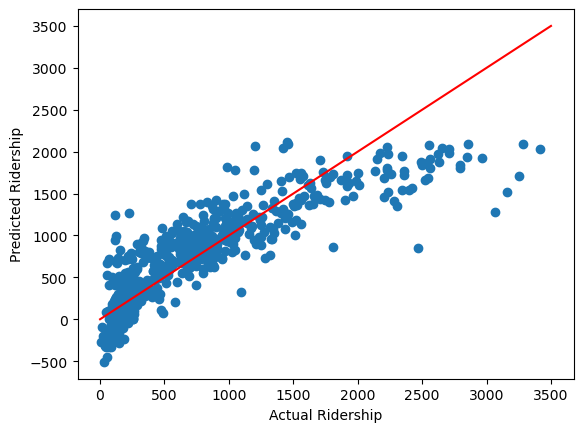

In [20]:
plt.scatter(y_train,LR_bike.predict(X_train))
plt.plot([i for i in range(1,3500)], [i for i in range(1,3500)],color="red")
plt.xlabel("Actual Ridership")
plt.ylabel("Predicted Ridership")

Notice that the predicted ridership sometimes is negative. The red line indicates when the predicted and actual ridership is equal. About half of the data points are above and below this line, though perhaps it seems the predicted ridership skews a bit higher when actual ridership is lwower.

Text(0, 0.5, 'Frequency')

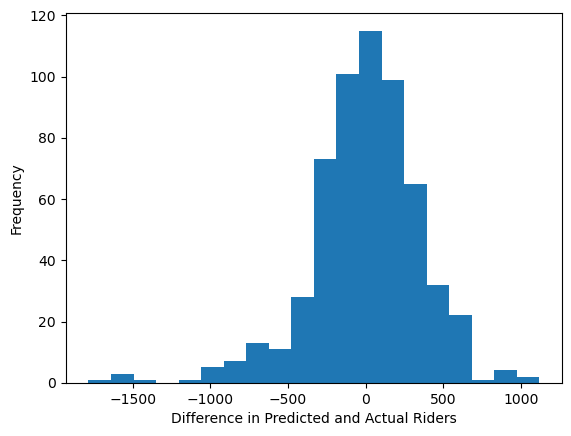

In [21]:
plt.hist((LR_bike.predict(X_train)-y_train),bins=20)
plt.xlabel("Difference in Predicted and Actual Riders")
plt.ylabel("Frequency")

And with this histogram, we can see that the difference between our predicted number of riders and the actual is roughly normally distributed, perhaps with some key on the negative side.

I suppose this is a good sign, it seems to indicate that there is not a strong bias in our data in terms of over or underpredicting.